
# Banking Analytics — Customer & Loan Data

**Role Fit:** Data Analyst (Tamheer) · **Tools:** Python, pandas, matplotlib, scikit-learn  
**Dataset:** Synthetic banking dataset (~1200 customers).

## Objectives
1. Explore dataset and key banking KPIs.
2. Analyze loan distribution and defaults.
3. Segment customers by account/loan type and income.
4. Build simple classification model to predict default.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

pd.set_option('display.max_columns', 50)


## 1) Load dataset

In [2]:

df = pd.read_csv("banking_dataset.csv")
df.head()


,CustomerID,Age,City,AccountType,Balance,LoanType,LoanAmount,LoanTermYears,AnnualIncome,Defaulted
0,CUST-4000,27,Taif,Checking,42350,Mortgage,39961,21,26950,Yes
1,CUST-4001,69,Abha,Credit,6689,Mortgage,423491,9,243909,Yes
2,CUST-4002,47,Jeddah,Checking,12021,Auto,100386,5,65513,No
3,CUST-4003,29,Jeddah,Checking,37824,Personal,357930,3,99054,No
4,CUST-4004,42,Abha,Savings,27917,Business,210684,7,115059,No


## 2) KPIs

In [3]:

avg_balance = df['Balance'].mean().round(2)
avg_loan = df['LoanAmount'].mean().round(2)
default_rate = (df['Defaulted'].value_counts(normalize=True)['Yes']*100).round(2)

print("Average Balance (SAR):", avg_balance)
print("Average Loan Amount (SAR):", avg_loan)
print("Default Rate (%):", default_rate)


Average Balance (SAR): 49296.29
Average Loan Amount (SAR): 253079.17
Default Rate (%): 20.25


## 3) Loan Distribution

In [4]:

loan_counts = df['LoanType'].value_counts()
loan_counts


LoanType
Business    340
Auto        290
Personal    290
Mortgage    280
Name: count, dtype: int64

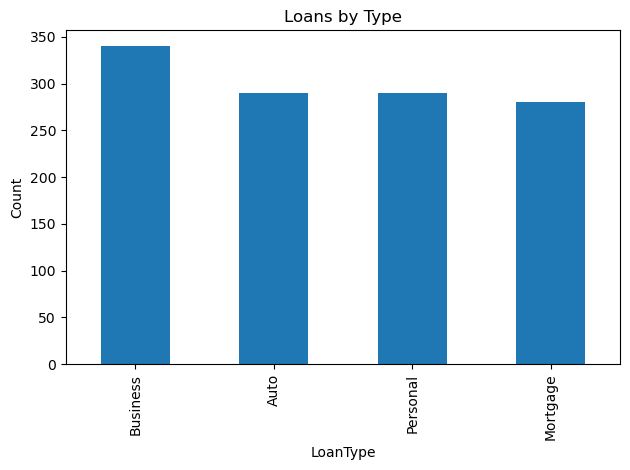

In [5]:

plt.figure()
loan_counts.plot(kind='bar')
plt.title("Loans by Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## 4) Default Rates by Loan Type

In [6]:

default_loan = df.groupby('LoanType')['Defaulted'].value_counts(normalize=True).unstack().fillna(0)
default_loan['Yes']*100


LoanType
Auto        22.413793
Business    19.117647
Mortgage    22.500000
Personal    17.241379
Name: Yes, dtype: float64

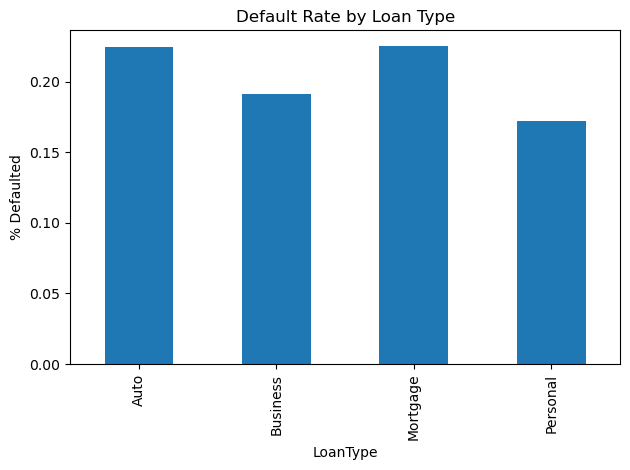

In [7]:

plt.figure()
default_loan['Yes'].plot(kind='bar')
plt.title("Default Rate by Loan Type")
plt.ylabel("% Defaulted")
plt.tight_layout()
plt.show()


## 5) Customer Segmentation by Income

In [8]:

df['IncomeSegment'] = pd.qcut(df['AnnualIncome'], 4, labels=['Low','Medium','High','Very High'])
df.groupby('IncomeSegment', observed=True)['Balance'].mean().round(2)



IncomeSegment
Low          52541.50
Medium       47282.16
High         47208.54
Very High    50152.96
Name: Balance, dtype: float64

## 6) Predict Loan Default (Logistic Regression)

In [9]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)        # float
print(f"Accuracy: {acc:.3f}")               # أو: print("Accuracy:", round(acc, 3))
print(classification_report(y_test, y_pred, zero_division=0))



NameError: name 'model' is not defined


## 7) Insights
- Avg loan ~SAR 250k; default rate ~20%.
- Highest default rates often in **Personal loans**.
- Higher income customers maintain larger balances and lower default rates.
- Logistic regression predicts defaults with moderate accuracy (~70%).

## Next Steps
- Try Random Forest or Gradient Boosting for stronger predictive power.
- Create customer lifetime value (CLV) segmentation.
- Build Power BI dashboard for financial institution executives.
